In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
measurments = pd.read_csv("LabMeasurements-Color-Card.csv", decimal=',', sep=';')
master_colors = pd.read_csv("MasterColorCard.csv", decimal=',', sep=';')

# make multilevel index for measurments columns
row = measurments['Row']
col = measurments['Column']
measurments = measurments.drop(['Row', 'Column'], axis=1)
new_cols = pd.MultiIndex.from_tuples(
    [(int(col[1:]), col[0]) for col in measurments.columns]
)
measurments.columns = new_cols
measurments.insert(0, 'Row', row)
measurments.insert(1, 'Column', col)

# make multilevel index for master color rows
master_colors.set_index(['Crow', 'Ccol'], inplace=True)

- 13 color sheets
- each sheet has 42 color cards (7x6)
- each color card has 64 (8x8) color spots

In [58]:
master_colors.head()

Field  p1  p2  p3  p4  p5       L       a       b
Crow Ccol                                                   
1    1         1   0   0   0  61   0  51.641   0.169   3.054
     2         2  39   0  73  60   0  43.875 -12.593  22.126
     3         3   0   0   0  61   0  51.641   0.169   3.054
     4         4  57  29   0  31   0  49.728  -3.525 -22.457
     5         5  46  38   0   7   0  56.471   9.119 -24.736

In [51]:
measurments.head()

Row Column       11                       12                         13  \
                    L       a       b        L        a        b        L   
0   1      1  55.5869  0.1352  2.1851  44.6537 -16.5998  26.5217  54.3402   
1   1      1  56.6057  0.0965  2.0268  45.5784 -16.4748  26.5005  55.1759   
2   1      1  55.7820  0.0675  2.1117  45.8756 -16.7413  27.5590  55.2332   
3   1      1  54.7352  0.1242  1.9708  45.0169 -16.5688  26.3886  54.5677   
4   1      1  55.7489  0.0936  2.0137  46.0037 -16.4222  27.2366  54.8732   

           ...       85       86                       87                    \
        a  ...        b        L       a       b        L        a        b   
0  0.1276  ... -27.4560  54.9534  0.1473  2.4664  30.4581  12.2833 -46.2010   
1  0.1109  ... -28.3820  55.1916  0.0547  2.5245  30.3830  11.4700 -46.3522   
2  0.0823  ... -28.5097  55.0177  0.1046  2.3408  30.1894   9.8993 -46.9088   
3  0.1373  ... -28.9948  55.8213  0.0734  2.2117  30.0988   9.0694 -47.2021   
4  0.0893  ... -28.0052  55.5748  0.0928  2.3985  30.2824  10.4085 -46.3234   

        88                  
         L       a       b  
0  54.8175  0.0991  2.5668  
1  55.3542  0.1891  1.9429  
2  55.0200  0.1039  2.3623  
3  55.8046  0.1328  1.5057  
4  54.8484  0.1337  1.9305  

[5 rows x 194 columns]

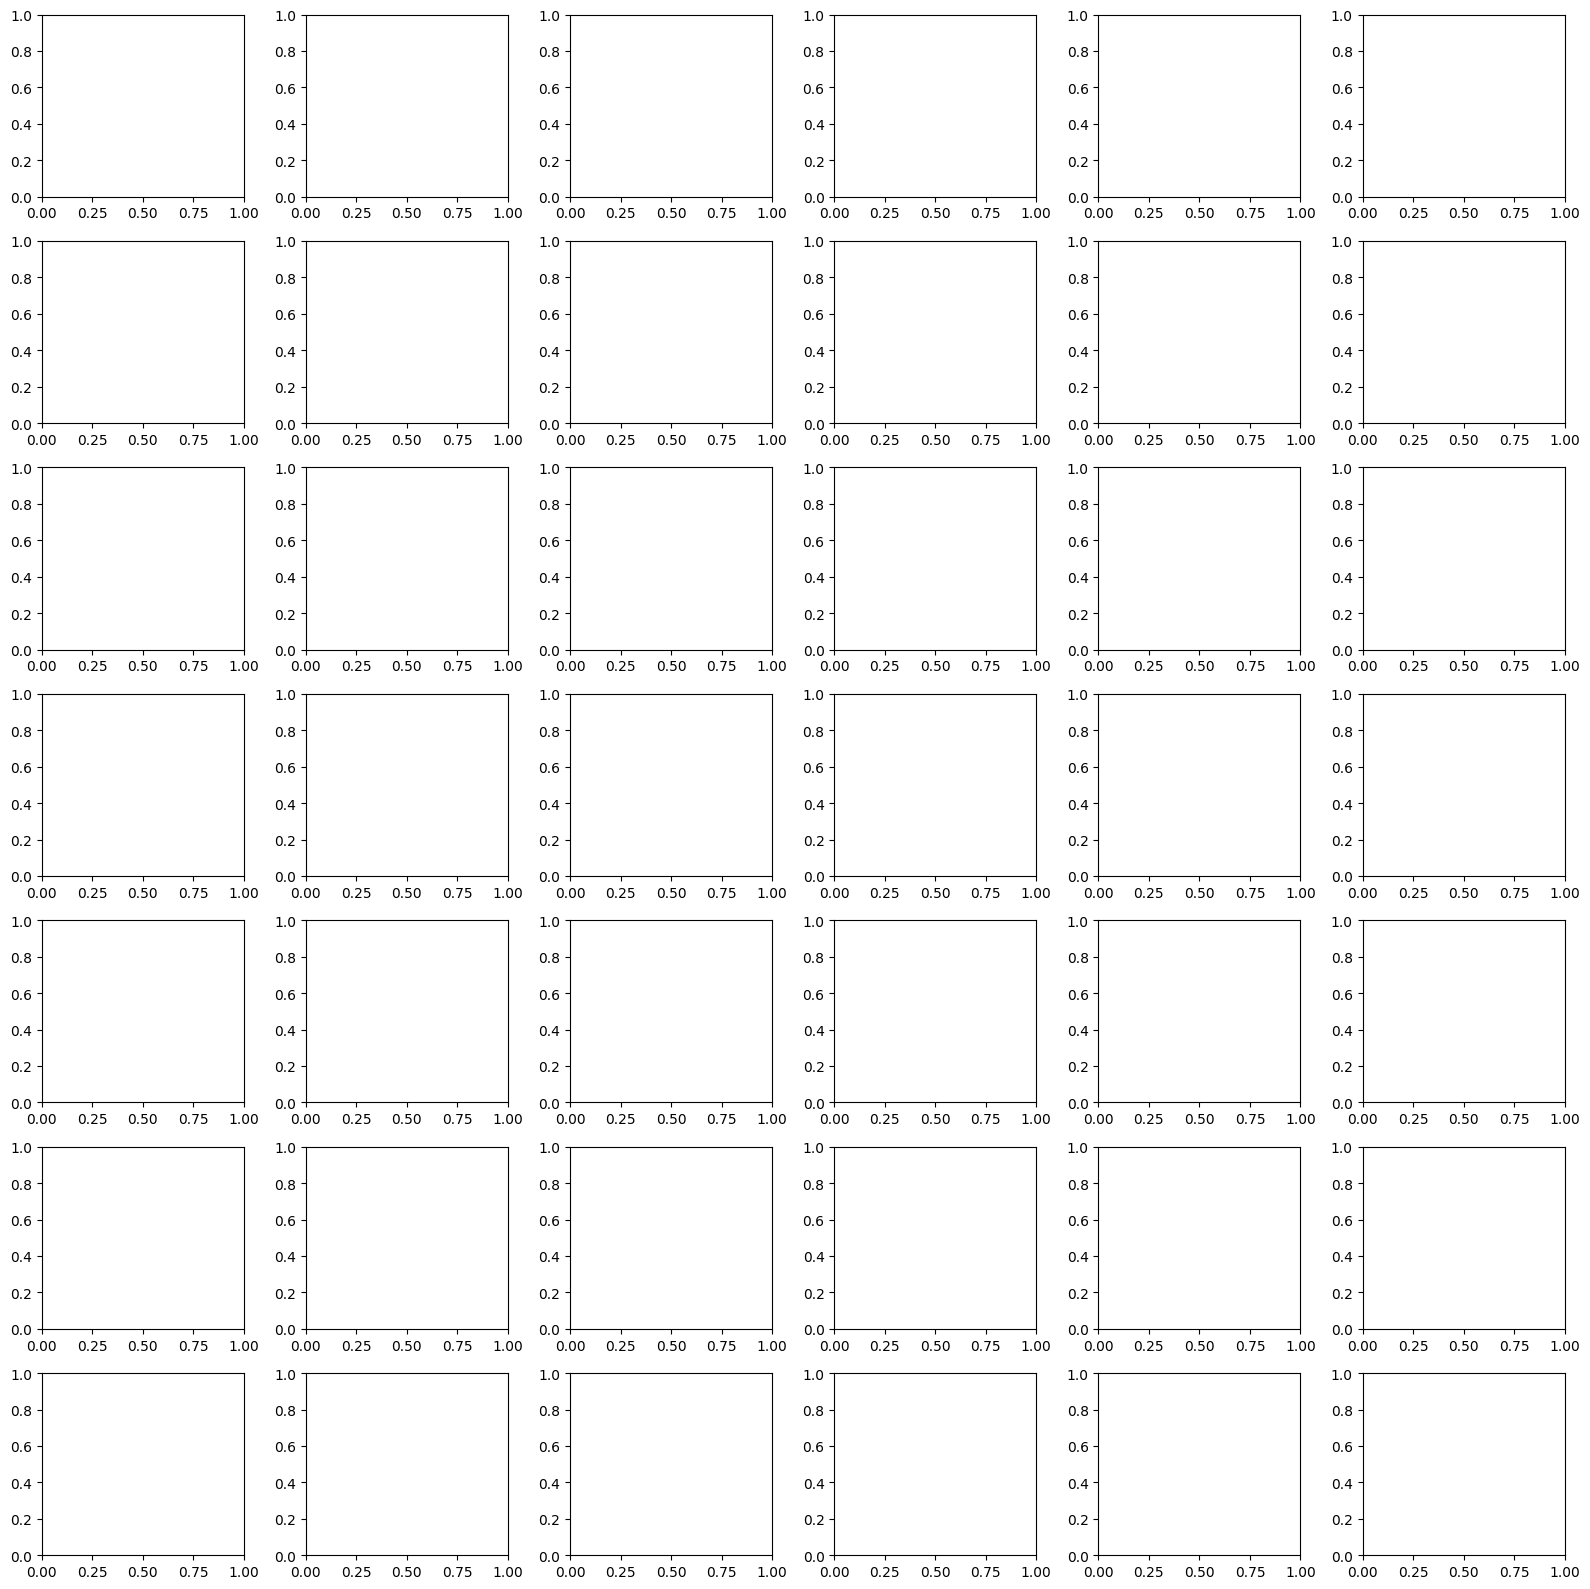

In [55]:
fig, axes = plt.subplots(7,6, figsize=(8*2,8*2))

for row in range(1,9):
    for col in range(1,9):
        l_measured = measurments[row*10+col]['L']
        l_master = master_colors.loc[row, col]['L']

plt.tight_layout()

In [42]:
measurments

Row Column       11                       12                         13  \
                      L       a       b        L        a        b        L   
0     1      1  55.5869  0.1352  2.1851  44.6537 -16.5998  26.5217  54.3402   
1     1      1  56.6057  0.0965  2.0268  45.5784 -16.4748  26.5005  55.1759   
2     1      1  55.7820  0.0675  2.1117  45.8756 -16.7413  27.5590  55.2332   
3     1      1  54.7352  0.1242  1.9708  45.0169 -16.5688  26.3886  54.5677   
4     1      1  55.7489  0.0936  2.0137  46.0037 -16.4222  27.2366  54.8732   
..   ..    ...      ...     ...     ...      ...      ...      ...      ...   
541   7      6  51.3529  0.1535  2.5116  41.8142 -17.1966  24.5488  51.2652   
542   7      6  51.7325  0.1591  2.6725  42.9063 -17.3043  24.4235  51.2479   
543   7      6  49.8446  0.2002  3.1458  41.5362 -16.9813  23.6754  50.9457   
544   7      6  51.3916  0.0478  2.9025  42.0855 -17.2863  23.6174  51.8642   
545   7      6  51.2899  0.1119  2.7868  42.0294 -17.0217  24.3015  51.4900   

             ...       85       86                       87                    \
          a  ...        b        L       a       b        L        a        b   
0    0.1276  ... -27.4560  54.9534  0.1473  2.4664  30.4581  12.2833 -46.2010   
1    0.1109  ... -28.3820  55.1916  0.0547  2.5245  30.3830  11.4700 -46.3522   
2    0.0823  ... -28.5097  55.0177  0.1046  2.3408  30.1894   9.8993 -46.9088   
3    0.1373  ... -28.9948  55.8213  0.0734  2.2117  30.0988   9.0694 -47.2021   
4    0.0893  ... -28.0052  55.5748  0.0928  2.3985  30.2824  10.4085 -46.3234   
..      ...  ...      ...      ...     ...     ...      ...      ...      ...   
541  0.1016  ... -26.8147  50.1159  0.1126  2.7552  29.1727  13.2323 -46.6225   
542  0.2456  ... -28.0736  51.2031  0.1050  2.7126  30.0281  12.5030 -46.5451   
543  0.2209  ... -27.6038  50.0215  0.1709  2.8176  30.9487  12.4166 -46.4093   
544  0.0657  ... -28.3498  51.2718  0.1503  2.6067  30.0836  11.9045 -46.7879   
545  0.0679  ... -27.2146  51.2198  0.1101  2.6923  30.5524  12.7085 -45.8635   

          88                  
           L       a       b  
0    54.8175  0.0991  2.5668  
1    55.3542  0.1891  1.9429  
2    55.0200  0.1039  2.3623  
3    55.8046  0.1328  1.5057  
4    54.8484  0.1337  1.9305  
..       ...     ...     ...  
541  50.5644  0.0896  2.6257  
542  51.6876  0.1705  2.5312  
543  50.1369  0.1598  2.8927  
544  51.5667  0.1565  2.6021  
545  51.4614  0.2108  2.6929  

[546 rows x 194 columns]

In [43]:
master_colors

,Field,Crow,Ccol,p1,p2,p3,p4,p5,L,a,b
0,1,1,1,0,0,0,61,0,51.641,0.169,3.054
1,2,1,2,39,0,73,60,0,43.875,-12.593,22.126
2,3,1,3,0,0,0,61,0,51.641,0.169,3.054
3,4,1,4,57,29,0,31,0,49.728,-3.525,-22.457
4,5,1,5,46,38,0,7,0,56.471,9.119,-24.736
...,...,...,...,...,...,...,...,...,...,...,...
59,60,8,4,89,4,0,0,54,51.081,-27.718,-27.779
60,61,8,5,71,100,0,33,0,30.962,21.967,-20.440
61,62,8,6,0,0,0,61,0,51.641,0.169,3.054
62,63,8,7,100,89,0,0,0,32.445,10.896,-38.340
